In [514]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [515]:
complete_data = pd.read_csv("../data/curated/complete_data.csv")
data = complete_data[['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]
data['Count_School'] = data['Count_School'].fillna(value = 0)
data['Count_Station'] = data['Count_Station'].fillna(value = 0)
data = data.dropna(axis=0)

Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [516]:
data = data[(data['Baths'] > 0) & (data['Bedrooms'] > 0)]

In [517]:
y = data['Weekly Rental Price']
x = data[['Postcode','Baths', 'Population', 'Count_School', 'Count_Station', 'Bedrooms']]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [518]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [519]:
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(6,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
])

In [520]:
model.compile(optimizer = "adam",
              loss='mean_squared_logarithmic_error',
              metrics=['msle'])

In [521]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
852/852 [==============================] - 31s 30ms/step - loss: 10.4172 - msle: 9.6621 - val_loss: 3.1094 - val_msle: 1.8241
Epoch 2/100
852/852 [==============================] - 31s 37ms/step - loss: 2.4407 - msle: 1.0773 - val_loss: 2.0112 - val_msle: 0.7285
Epoch 3/100
852/852 [==============================] - 24s 28ms/step - loss: 1.7584 - msle: 0.6234 - val_loss: 1.5525 - val_msle: 0.5539
Epoch 4/100
852/852 [==============================] - 20s 24ms/step - loss: 1.3887 - msle: 0.4757 - val_loss: 1.2603 - val_msle: 0.4265
Epoch 5/100
852/852 [==============================] - 26s 30ms/step - loss: 1.1667 - msle: 0.3908 - val_loss: 1.1008 - val_msle: 0.3733
Epoch 6/100
852/852 [==============================] - 30s 35ms/step - loss: 1.0381 - msle: 0.3499 - val_loss: 0.9955 - val_msle: 0.3452
Epoch 7/100
852/852 [==============================] - 27s 32ms/step - loss: 0.9446 - msle: 0.3263 - val_loss: 0.9119 - val_msle: 0.3276
Epoch 8/100
852/852 [===================

In [522]:
model.evaluate(X_test, Y_test)[1]

183/183 [==============================] - 2s 8ms/step - loss: 0.2869 - msle: 0.2539


0.25386640429496765

In [523]:
import matplotlib.pyplot as plt

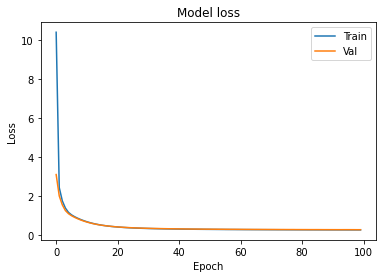

In [524]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

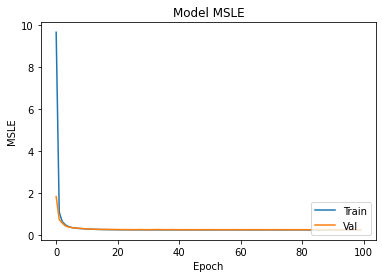

In [525]:
plt.plot(hist.history['msle'])
plt.plot(hist.history['val_msle'])
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [530]:
import pandas as pd
pop = pd.read_csv("../data/curated/predicted_population.csv")

In [531]:
post_data = complete_data[['Postcode', 'Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]

In [532]:
pop_2023 = pop[['Postcode','2023']]
pop_2024 = pop[['Postcode','2024']]
pop_2025 = pop[['Postcode','2025']]

In [533]:
pop_2023 = pd.merge(pop_2023, post_data, how='inner', on=['Postcode'])
pop_2023 =pop_2023.drop(labels=['Population'],axis=1) 
pop_2023 = pop_2023[['Postcode', '2023', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [534]:
pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis=0)
pop_2023 = pop_2023[(pop_2023['Baths'] > 0) & (pop_2023['Bedrooms'] > 0)]
pred_2023 = model.predict(pop_2023)
data.insert(6, 'Pred_2023', pred_2023)

1217/1217 [==============================] - 14s 11ms/step


In [535]:
pop_2024 = pd.merge(pop_2024, post_data, how='inner', on=['Postcode'])
pop_2024 =pop_2024.drop(labels=['Population'],axis=1) 
pop_2024 = pop_2024[['Postcode', '2024', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [536]:
pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pop_2024 = pop_2024[(pop_2024['Baths'] > 0) & (pop_2024['Bedrooms'] > 0)]
pred_2024 = model.predict(pop_2024)
data.insert(7, 'Pred_2024', pred_2024)

1217/1217 [==============================] - 25s 20ms/step


In [537]:
pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'],axis=1) 
pop_2025 = pop_2025[['Postcode', '2025', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [538]:
pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pop_2025 = pop_2025[(pop_2025['Baths'] > 0) & (pop_2025['Bedrooms'] > 0)]
pred_2025 = model.predict(pop_2025)
data.insert(8, 'Pred_2025', pred_2025)

1217/1217 [==============================] - 30s 25ms/step


In [540]:
data

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Pred_2023,Pred_2024,Pred_2025,Weekly Rental Price
5,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0
6,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0
7,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0
8,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0
9,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0
...,...,...,...,...,...,...,...,...,...,...
42824,3996,1,36889.657143,0.0,0.0,2,592.369141,597.869751,603.613770,420.0
42825,3996,1,36889.657143,0.0,0.0,2,592.369141,597.869751,603.613770,370.0
42826,3996,1,36889.657143,0.0,0.0,2,592.369141,597.869812,603.613770,370.0
42827,3996,2,36889.657143,0.0,0.0,3,592.364807,597.865479,603.609375,475.0


In [542]:
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [543]:
data['rate_2024'] = (data['Pred_2024'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [544]:
data['rate_2025'] = (data['Pred_2025'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [545]:
data

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Pred_2023,Pred_2024,Pred_2025,Weekly Rental Price,rate_2023,rate_2024,rate_2025
5,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0,0.342093,0.345182,0.347756
6,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0,0.342093,0.345182,0.347756
7,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0,0.342093,0.345182,0.347756
8,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0,0.342093,0.345182,0.347756
9,3000,1,34652.148872,4.0,45.0,1,590.520874,591.880066,593.012573,440.0,0.342093,0.345182,0.347756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42824,3996,1,36889.657143,0.0,0.0,2,592.369141,597.869751,603.613770,420.0,0.410403,0.423499,0.437176
42825,3996,1,36889.657143,0.0,0.0,2,592.369141,597.869751,603.613770,370.0,0.600998,0.615864,0.631389
42826,3996,1,36889.657143,0.0,0.0,2,592.369141,597.869812,603.613770,370.0,0.600998,0.615864,0.631389
42827,3996,2,36889.657143,0.0,0.0,3,592.364807,597.865479,603.609375,475.0,0.247084,0.258664,0.270757


In [546]:
data.to_csv("../data/curated/NNpredi.csv")